<a href="https://colab.research.google.com/github/William-Stephen-Jones/WSJ/blob/main/CNN_PneumoniaCXR_WSJ_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The clincial problem and the role of machine learning (ML)
Pneumonia is a medical condition in which the air sacs in one or both lungs become inflamed and fill with fluid or pus, making it difficult to breathe. Pneumonia can be caused by viruses, bacteria, fungi, or other microorganisms. Symptoms of pneumonia include cough, fever, chills, shortness of breath, chest pain, fatigue, and confusion.

The process of making a pneumonia diagnosis varies depending on setting, but in general a clinician will typically begin with a physical examination, checking for symptoms such as rapid breathing and abnormal lung sounds. They may also order a chest X-ray, blood tests, or other diagnostic imaging tests to confirm the diagnosis and determine the severity of the infection.

Chest X-rays are a commonly used diagnostic tool for pneumonia. They can help doctors identify areas of inflammation and fluid in the lungs, which are indicative of the condition. However, while chest X-rays can be useful for detecting pneumonia, they are not always reliable. In some cases, a chest X-ray may fail to detect the infection, or it may appear abnormal even if the person does not have pneumonia.

Moreover, the interpretation of chest X-rays is subjective, and can vary depending on the clinician reading them. This subjectivity can lead to potential biases in the diagnosis of pneumonia, and can also make it more time-consuming to read and analyze chest X-rays.

To mitigate these potential issues with chest X-rays, some healthcare providers are exploring the use of artificial intelligence (AI) and machine learning algorithms to analyze medical imaging. These technologies have the potential to reduce subjectivity and improve accuracy in the diagnosis of pneumonia and other medical conditions. However, further research is needed to determine the effectiveness of these approaches and how they can best be integrated into clinical practice.


# This notebook
The Kaggle dataset accessed via this colab notebook contains chest X-ray images of patients with and without pneumonia, and the goal below is to develop a CNN machine learning model that can accurately differentiate between the two groups. 

The dataset includes a total of 5,856 X-ray images, including 4,387 images with pneumonia and 1,469 images without pneumonia. The kaggle dataset can be accessed here: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

This dataset and notebook is (hopefully) useful for researchers and machine learning practitioners who are interested in developing and evaluating models for the automated detection of pneumonia using chest X-ray images. The dataset has the potential to improve the accuracy and efficiency of pneumonia diagnosis, which can have important implications for patient care and treatment.

# ----- The Code -----

Kernals I am working through: 


*   https://www.kaggle.com/code/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia
*   ...



## Install and import dependencies

In [1]:
# General libraries
import numpy as np                                                               # N-dimensional array computing, with efficient element-wise operations and broadcasting.
import matplotlib.pyplot as plt                                                  # Creating static, animated, and interactive visualizations in Python.
import matplotlib.image as mpimg                                                 # A module in the matplotlib library that provides functions for reading and manipulating image data.
import os
from PIL import Image                                                                         # A way to interact with opertating system, paths for input data and output model

# Machine learning libraries
import tensorflow as tf                                                          # Open-source library for building and training machine learning models in Pyth
import keras                                                                     # A module in tf providing a user-friendly interface for building and training deep learning models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from sklearn.metrics import classification_report, confusion_matrix




## Access data via google drive (gdrive)
 

In [2]:
# Mount my gdrive. The data is stored here.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


The data is located in three folders: 


1. train = contains the training data/images for teaching our model.
2. val = contains images which we will use to validate our model. The purpose of this data set is to prevent our model from **Overfitting**. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.
3. test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)






## Set file paths

In [3]:
# Set base directory
base_dir = '/content/drive/MyDrive/DAIM_Project_PneumoniaCXR/chest_xray'

# See the folders in the base directory
print(os.listdir(base_dir))

['.DS_Store', '__MACOSX', 'test', 'train', 'chest_xray', 'val']


In [4]:
# Set paths for the relevant folders with data in them
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
## train_dir, val_dir, test_dir

In [5]:
# Setup training folders folders
## print(os.listdir(train_dir))
train_n = train_dir+'/NORMAL/'
train_p = train_dir+'/PNEUMONIA/'

normal picture title:  NORMAL2-IM-0957-0001.jpeg
pneumonia picture title: person1595_virus_2771.jpeg


Text(0.5, 1.0, 'Pneumonia')

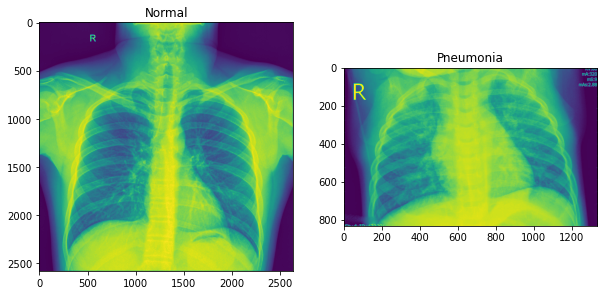

In [11]:
# Select the healthy chest x-ray
rand_norm= np.random.randint(0,len(os.listdir(train_n))) # Selects a random number from the range of numbers in normal
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n + norm_pic

# Select the pneumonia chest x-ray
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_p]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [12]:
img_height = 224
img_width = 224
batch_size = 32

In [13]:
num_of_test_samples = 600
batch_size = 32

In [ ]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through 
# image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32, 
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

<ipython-input-11-54bbfc3cc336>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(training_set,


163/163 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8332

163/163 [==============================] - 614s 4s/step - loss: 0.3626 - accuracy: 0.8332 - val_loss: 0.3355 - val_accuracy: 0.8125


In [ ]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

<ipython-input-12-e3e116046788>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


The testing accuracy is : 81.89102411270142 %


In [ ]:
Y_pred = cnn.predict_generator(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

<ipython-input-13-9bc6ac013fad>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_set, 100)


0

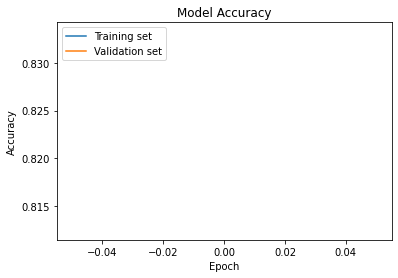

In [ ]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

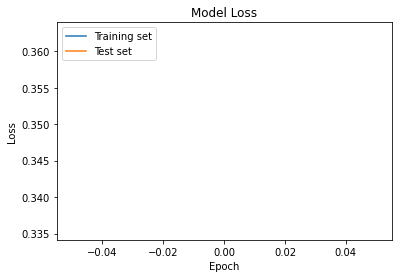

In [ ]:
# Loss 
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
print(cnn_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
cnn_model.history['accuracy'],
cnn_model.history['val_accuracy']

[0.8125]

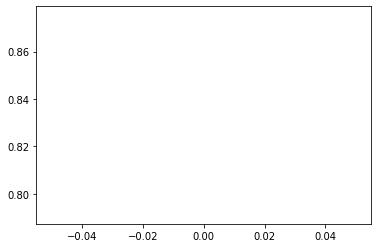

In [ ]:
plt.plot(cnn_model.history['accuracy'])

# Limitations of kernel


* The data for pneumonia includes bacterial and viral. It lumps them together and classifies them both as pneumonia. This is true, but is a suboptimal approach, since viral and bacterial pneumonias can be treated differently. For example, bacterial pneumonias will be treated with antibiotics, whereas antibiotics do not work against viral infections, though a viral infection may become bacterial.
* We do not know much detail about the data, and the data may not be representative of clinical practice, so of limited utility.

